In [ ]:
# Imagen 

In [55]:
import rasterio 

In [56]:
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt


import geopandas as gpd

In [57]:
full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\2021\composite_2021_summer.tif')

In [58]:
full_dataset.count

19

In [59]:
training_sites = gpd.read_file(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\trabajo sitios de entrenamiento\2021\sitios_entrenamient_geo.gpkg', layer = 'sitios_entrenamient_2021' )

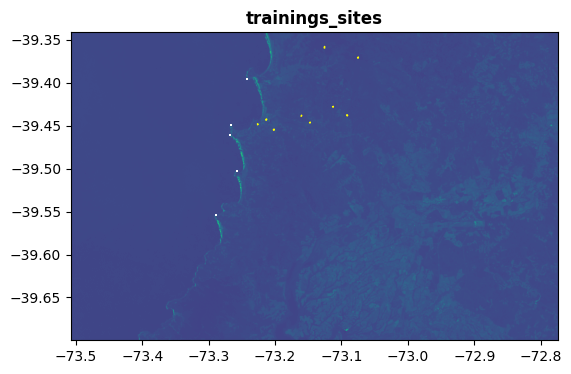

In [62]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset, ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()

In [63]:
clipped_img_7b_ord = full_dataset.read([1,2,3,4,5,6,7])[:, 500:1200, 1000:3000]
print(clipped_img_7b_ord.shape)

(7, 700, 1722)


In [65]:
import rasterio
import numpy as np

# Open the dataset
with rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\2021\composite_2021_summer.tif') as src:
    # Read the first seven bands
    full_dataset = src.read([1,2,3,4,5,6,7])

    # Clip the image
    clipped_img_7b_ord = full_dataset[:, 500:1200, 1000:3000]

    # Update the metadata
    transform = src.transform
    new_transform = rasterio.Affine(transform.a, transform.b, transform.c + 1000 * transform.a,
                                     transform.d, transform.e, transform.f + 500 * transform.e)

    # Define rasterio dataset characteristics
    with rasterio.open('clipped_img_7b_ord_transform.tif', 'w', driver='GTiff',
                       height = clipped_img_7b_ord.shape[1], # numpy array shape (row)
                       width = clipped_img_7b_ord.shape[2],  # numpy array shape (col)
                       count=clipped_img_7b_ord.shape[0],
                       dtype=str(clipped_img_7b_ord.dtype),
                       crs=src.crs,
                       transform=new_transform) as dst:
        dst.write(clipped_img_7b_ord)

In [64]:
# Assuming 'clipped_img' is your clipped image
# and 'full_dataset' is your original raster dataset

# Update metadata
out_meta = full_dataset.meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": clipped_img_7b_ord.shape[1],
    "width": clipped_img_7b_ord.shape[2],
    "count": 7,  # Set the number of bands to 6
    #"transform": full_dataset.transform
})

# Write the clipped image to disk
with rasterio.open('clipped_image_7b_ordt.tif', 'w', **out_meta) as dest:
    dest.write(clipped_img_7b_ord)

In [49]:
clipped_img

array([[[0.0427425 , 0.0528625 , 0.0922425 , ..., 0.04388375,
         0.04228875, 0.03882375],
        [0.024785  , 0.03034   , 0.068125  , ..., 0.046565  ,
         0.0519825 , 0.03766875],
        [0.0473075 , 0.0573175 , 0.052395  , ..., 0.04630375,
         0.05581875, 0.04332   ],
        ...,
        [0.06079625, 0.06079625, 0.097495  , ..., 0.02556875,
         0.02845625, 0.02867625],
        [0.05821125, 0.05821125, 0.07416125, ..., 0.027975  ,
         0.03486375, 0.02779625],
        [0.05652   , 0.05652   , 0.067465  , ..., 0.02737   ,
         0.03511125, 0.0288825 ]],

       [[0.0794    , 0.0907575 , 0.16652   , ..., 0.10366875,
         0.10446625, 0.097495  ],
        [0.062625  , 0.0691975 , 0.1152875 , ..., 0.1136375 ,
         0.12352375, 0.09286125],
        [0.104975  , 0.10844   , 0.097275  , ..., 0.11134125,
         0.12302875, 0.10415   ],
        ...,
        [0.1315125 , 0.1315125 , 0.17695625, ..., 0.0650175 ,
         0.07196125, 0.072305  ],
        [0.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


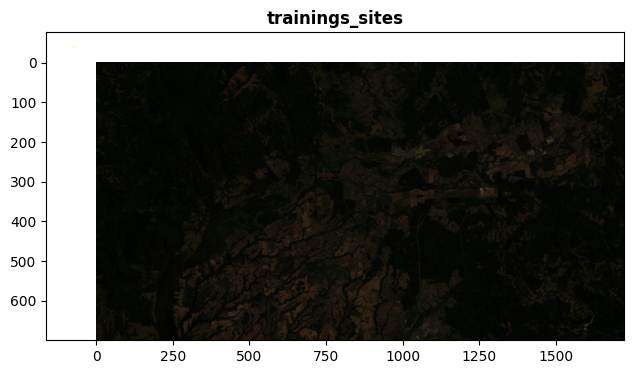

In [37]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset.read([4,3,2])[:, 500:1200, 1000:3000], ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()
